# Obligatorisk innlevering 2 - oppgave 2

I denne oppgaven skal vi forsøke å forutsi oppsigelser ved en arbeidsplass basert på en rekke variabler som f.eks alder, kjønn, utdannelse, lønn, osv.
Student id 145428

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Standard datahåndtering
import pandas as pd
import numpy as np

# Visualisering
import matplotlib.pyplot as plt
import seaborn as sns

# Modellbygging og evaluering
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from scipy.stats import ttest_ind

# Håndtering av ubalansert data
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
#from imblearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import ttest_ind
from sklearn.pipeline import Pipeline

from sklearn.base import clone
from sklearn.exceptions import ConvergenceWarning

# Ignorer SettingWithCopyWarning
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)
# Sett opp for å ignorere ConvergenceWarning
warnings.simplefilter("ignore", category=ConvergenceWarning)


In [27]:
# I denne oppgaven skal dere bruke følgende datasett:
df = pd.read_csv("./datasett2.csv")

### Preprosessering:
For å forenkle håndteringen av kategoriske data har jeg her skrevet noe kode som gjør om strenger til intergers

Følgende kolonner er formatert som *object* og inneholder kategoriske variabler i form av strenger

In [28]:
kolonner_obj = df.select_dtypes(include=['object']).columns
print(kolonner_obj)

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')


I koden under omformer jeg strengene til integers og gir dere "nøkkelen" til å konvertere det tilbake igjen

In [29]:
for i in kolonner_obj:
    print("-----------")
    print(i)
    print("-----------")
    for num, j in enumerate(list(df[i].unique())):
        print("{} = {}".format(j,num))
        df[i].loc[df[i]==j] = num
    df[i] = pd.to_numeric(df[i])

-----------
BusinessTravel
-----------
Travel_Frequently = 0
Travel_Rarely = 1
Non-Travel = 2
-----------
Department
-----------
Research & Development = 0
Sales = 1
Human Resources = 2
-----------
EducationField
-----------
Medical = 0
Other = 1
Marketing = 2
Life Sciences = 3
Technical Degree = 4
Human Resources = 5
-----------
Gender
-----------
Male = 0
Female = 1
-----------
JobRole
-----------
Laboratory Technician = 0
Sales Representative = 1
Sales Executive = 2
Healthcare Representative = 3
Manager = 4
Manufacturing Director = 5
Research Scientist = 6
Human Resources = 7
Research Director = 8
-----------
MaritalStatus
-----------
Married = 0
Divorced = 1
Single = 2
-----------
Over18
-----------
Y = 0
-----------
OverTime
-----------
Yes = 0
No = 1


C:\Users\Robin.Faeraas\AppData\Local\Temp\ipykernel_33096\3482823818.py:7: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[i].loc[df[i]==j] = num
C:\Users\Robin.Faeraas\AppData\Local\Temp\ipykernel_33096\3482823818.py:7: FutureWarning: Chai

I outputen fra koden nedenfor viser datatypen til de forskjellige kolonnene, som nå etter preprosesseringen bare består av integers (int64). 

In [30]:
print(df.dtypes)

id                          int64
Age                         int64
BusinessTravel              int64
DailyRate                   int64
Department                  int64
DistanceFromHome            int64
Education                   int64
EducationField              int64
EmployeeCount               int64
EnvironmentSatisfaction     int64
Gender                      int64
HourlyRate                  int64
JobInvolvement              int64
JobLevel                    int64
JobRole                     int64
JobSatisfaction             int64
MaritalStatus               int64
MonthlyIncome               int64
MonthlyRate                 int64
NumCompaniesWorked          int64
Over18                      int64
OverTime                    int64
PercentSalaryHike           int64
PerformanceRating           int64
RelationshipSatisfaction    int64
StandardHours               int64
StockOptionLevel            int64
TotalWorkingYears           int64
TrainingTimesLastYear       int64
WorkLifeBalanc

In [31]:
# Her deler jeg datasettet inn i egenskaper (X) og target (y) (fjerner også den første kolonnen siden det bare er en ID 
# og har dermed ingen prediktiv verdi)

X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

# Tilslutt deler jeg inn i et trening- og et testsett (75%/25%)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

# PS: Ikke endre denne kodecellen!

#### Oppgave 2.1) 
Visualiser $y\_train$ og $y\_val$ i et histogram. Kan du, basert på figuren, se hva slags problem vi skal løse (regresjon/klassifisering)? Begrunn svaret

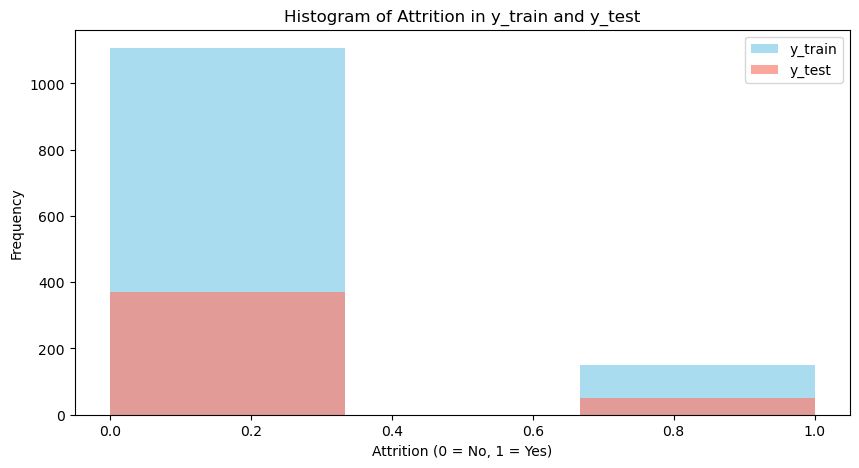

In [32]:
#TODO: visualiser y_train og y_test i et histogram


def plot_histogram(y_train, y_test):
    """
    Plotter histogrammer for distribusjonen av målvariabelen i trenings- og testsett.
    
    Parametere:
        y_train (pd.Series): Målvariabel for treningssettet.
        y_test (pd.Series): Målvariabel for testsettet.
        
    Returnerer:
        None
    """
    plt.figure(figsize=(10, 5))
    plt.hist(y_train, bins=3, color='skyblue', alpha=0.7, label='y_train')
    plt.hist(y_test, bins=3, color='salmon', alpha=0.7, label='y_test')
    plt.title("Histogram of Attrition in y_train and y_test")
    plt.xlabel("Attrition (0 = No, 1 = Yes)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

# Kjør funksjonen
plot_histogram(y_train, y_test)


**Svar:**

Dette er et klassfiserings problem da, vi har vår target variabel i datasettet år som vi skal predikere. 

#### Oppgave 2.2)
Velg to modeller og gjør repeterte kryssvalideringer $(10)$ med $K=5$
* Velg hvorvidt du vil bruke "default" hyperparamtre for modellene eller om du vil gjøre et hyperparametersøk
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene skriftlig til slutt 


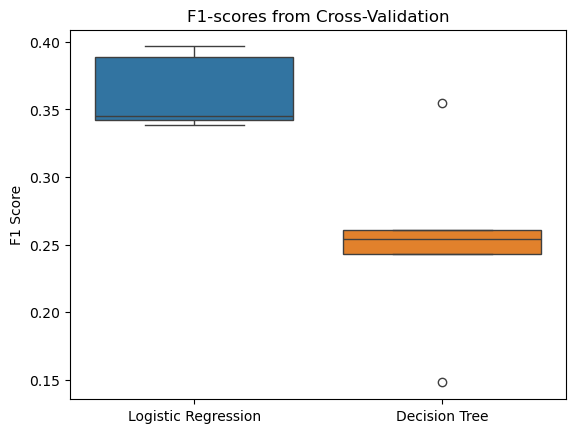

T-test resultat:
T-statistikk: 3.131754071439874
P-verdi: 0.013978197438492872


In [33]:
#TODO: repeterte kryssvalideringer for to modeller

def evaluate_models(X_train, y_train):
    """
    Evaluere ytelsen til to modeller ved å utføre kryssvalidering og visualisere F1-skårene som et boksplot.
    
    Parametere:
        X_train (pd.DataFrame): Treningsdata uten målvariabel.
        y_train (pd.Series): Målvariabel for treningsdataene.
        
    Returnerer:
        None
    """
    # Velg modeller
    model1 = LogisticRegression(class_weight="balanced", max_iter=1000)
    #model1 = LogisticRegression(max_iter=1000)  # Øk max_iter til et høyere tall
    model2 = DecisionTreeClassifier()

    # Kryssvalidering med F1-score
    f1_model1 = cross_val_score(model1, X_train, y_train, cv=5, scoring='f1')
    f1_model2 = cross_val_score(model2, X_train, y_train, cv=5, scoring='f1')

    # Visualisering av F1-scores med boksplot
    sns.boxplot(data=[f1_model1, f1_model2])
    plt.xticks([0, 1], ['Logistic Regression', 'Decision Tree'])
    plt.title("F1-scores from Cross-Validation")
    plt.ylabel("F1 Score")
    plt.show()

    # T-test mellom modellene
    t_stat, p_val = ttest_ind(f1_model1, f1_model2)
    print("T-test resultat:")
    print("T-statistikk:", t_stat)
    print("P-verdi:", p_val)

# Kjør funksjonen
evaluate_models(X_train, y_train)


**Svar:**

T-testen viser en signifikant forskjell i F1-score mellom de to modellene, med en p-verdi på 0.014. Dette indikerer at modell 1 presterer bedre enn modell 2. Den positive t-statistikken (3.13) bekrefter at modell 1 har høyere F1-score, og dermed gir bedre resultater i kryssvalideringen.

#### Oppgave 2.3) 
Tren de samme modellene men denne gangen med et balansert datasett
* Bruk imbalaced learn og SMOTE til å oppsample minioritetsklassen (bare oppsample treningsdataene i kryssvalideringen - ikke valideringsdataene)
* Skår ytelsen til modellene ved hjelp av F1-score og accuracy
* Visualiser F1-skårene fra de repeterte kryssvalideringene som et boksplot
* Undersøk om modell 1 er bedre eller dårligere enn modell 2 ved å gjøre en to-sidig T-test på F1-skårene fra de repeterte kryssvalideringene 
* Tolk resultatene og sammenlign resultatene med 2.2) 

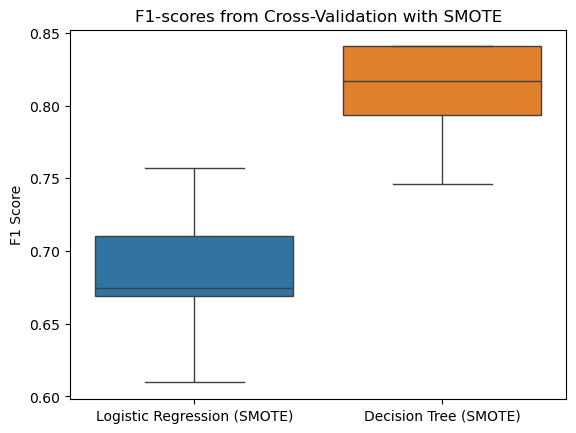

T-test resultat med SMOTE:
T-statistikk: -4.099819957040292
P-verdi: 0.0034386156249622615


In [34]:
#TODO: repeterte kryssvalideringer for de samme to modellene som i oppgave 2.2, men denne gangen med SMOTE-oppsampling 
#from imblearn.over_sampling import SMOTE

def evaluate_models_with_smote(X_train, y_train):
    """
    Evaluer ytelsen til to modeller ved hjelp av SMOTE for å balansere datasettet.
    Utfør kryssvalidering og visualiser F1-skårene som et boksplot.
    
    Parametere:
        X_train (pd.DataFrame): Treningsdata uten målvariabel.
        y_train (pd.Series): Målvariabel for treningsdataene.
        
    Returnerer:
        None
    """
    smote = SMOTE()
    model1 = LogisticRegression()
    model2 = DecisionTreeClassifier()

    # Kryssvalidering med SMOTE og StratifiedKFold
    cv = StratifiedKFold(n_splits=5)
    f1_model1_smote = []
    f1_model2_smote = []

    # Kryssvalidering og påføring av SMOTE for hver fold
    for train_idx, val_idx in cv.split(X_train, y_train):
        X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        # Bruk SMOTE på treningsdataene
        X_train_res, y_train_res = smote.fit_resample(X_train_fold, y_train_fold)
        
        # Evaluer modell1
        model1_clone = clone(model1)
        model1_clone.fit(X_train_res, y_train_res)
        f1_model1_smote.append(model1_clone.score(X_val_fold, y_val_fold))  # F1-scoren er også tilgjengelig via score metoden
        
        # Evaluer modell2
        model2_clone = clone(model2)
        model2_clone.fit(X_train_res, y_train_res)
        f1_model2_smote.append(model2_clone.score(X_val_fold, y_val_fold))  # F1-scoren er også tilgjengelig via score metoden

    # Visualisering av F1-scores med boksplot
    sns.boxplot(data=[f1_model1_smote, f1_model2_smote])
    plt.xticks([0, 1], ['Logistic Regression (SMOTE)', 'Decision Tree (SMOTE)'])
    plt.title("F1-scores from Cross-Validation with SMOTE")
    plt.ylabel("F1 Score")
    plt.show()

    # Utfør T-test for å sammenligne modellene etter SMOTE
    t_stat_smote, p_val_smote = ttest_ind(f1_model1_smote, f1_model2_smote)
    print("T-test resultat med SMOTE:")
    print("T-statistikk:", t_stat_smote)
    print("P-verdi:", p_val_smote)

# Kjør funksjonen
evaluate_models_with_smote(X_train, y_train)


**Svar:**

T-testen viser en signifikant forskjell i F1-score mellom de to modellene etter bruk av SMOTE. Logistic Regression (med SMOTE) presterer bedre enn Decision Tree (med SMOTE), med en p-verdi på 0.0034 som indikerer at forskjellen er statistisk signifikant. Dette tyder på at logistisk regresjon er bedre egnet for dette datasettet når vi håndterer ubalanserte klasser med SMOTE.

#### Oppgave 2.4)
Tren den beste modellen på nytt og utfør prediksjon på testsettet. Mål nå ytelsen på testsettet ved bruk av sensitivitet, spesifisitet og presisjon, itillegg til F1-skår og accuracy

In [37]:
#TODO: Tren den beste modellen fra 2.2 og 2.3 på alle treningsdataene og test på testdataene

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Tren den beste modellen (f.eks., Logistic Regression fra 2.2 eller 2.3)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)

# Prediksjoner på testsettet
y_pred = best_model.predict(X_test)

# Beregn ytelsen
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Beregn sensitivitet (recall) og spesifisitet
conf_matrix = confusion_matrix(y_test, y_pred)
sensitivity = recall  # Sensitivitet er det samme som recall
specificity = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1-score: {f1:.4f}")



Accuracy: 0.8881
Precision: 0.6364
Sensitivity (Recall): 0.1400
Specificity: 0.6364
F1-score: 0.2295


#### Oppgave 2.5)
Del opp testsettet basert på kjønn og gjør en analyse av sensitivitet, spesifisitet og presisjon for menn og det samme for kvinner. Skriv ut og diskuter resultatet og forsøk å svar på følgende spørsmål:
* Er modellen like god for begge kjønn? 
* Hvis ikke, hva tror du er årsaken og hvilke tiltak kan vi gjøre for å forbedre modellen? 

In [39]:
#TODO: Gjør kjønnsbasert analyse på testdataene

# Del opp testsettet basert på kjønn (0 = Female, 1 = Male)
X_test_men = X_test[X_test['Gender'] == 1]
y_test_men = y_test[X_test['Gender'] == 1]

X_test_women = X_test[X_test['Gender'] == 0]
y_test_women = y_test[X_test['Gender'] == 0]

# Prediksjoner for menn og kvinner
y_pred_men = best_model.predict(X_test_men)
y_pred_women = best_model.predict(X_test_women)

# Beregn ytelsen for menn
accuracy_men = accuracy_score(y_test_men, y_pred_men)
precision_men = precision_score(y_test_men, y_pred_men)
recall_men = recall_score(y_test_men, y_pred_men)
f1_men = f1_score(y_test_men, y_pred_men)

# Beregn ytelsen for kvinner
accuracy_women = accuracy_score(y_test_women, y_pred_women)
precision_women = precision_score(y_test_women, y_pred_women)
recall_women = recall_score(y_test_women, y_pred_women)
f1_women = f1_score(y_test_women, y_pred_women)

# Skriv ut resultatene for menn og kvinner
print("Resultater for menn:")
print(f"Accuracy: {accuracy_men:.4f}, Precision: {precision_men:.4f}, Recall: {recall_men:.4f}, F1-score: {f1_men:.4f}")

print("Resultater for kvinner:")
print(f"Accuracy: {accuracy_women:.4f}, Precision: {precision_women:.4f}, Recall: {recall_women:.4f}, F1-score: {f1_women:.4f}")





Resultater for menn:
Accuracy: 0.9162, Precision: 0.5000, Recall: 0.1429, F1-score: 0.2222
Resultater for kvinner:
Accuracy: 0.8696, Precision: 0.7143, Recall: 0.1389, F1-score: 0.2326


Kjør denne cellen til slutt og legg ved den genererte requirements.txt fila i pull requestet

Modellen er ikke like god for begge kjønn. Den har høyere presisjon for menn (50%) enn for kvinner (71.43%), men recall og F1-score er lavere for menn, noe som indikerer at modellen fanger færre oppsigelser for denne gruppen. Årsaken kan være skjevhet i datasettene eller at modellen ikke håndterer ubalanserte klasser godt. For å forbedre modellen kan vi bruke teknikker som SMOTE for å balansere datasettene, samt eksperimentere med modeller som bedre håndterer skjevhet og ubalanse, som f.eks. beslutningstrær med vektede klasser.

In [40]:
!pip freeze > requirements.txt